<a href="https://colab.research.google.com/github/litimamine/ML/blob/master/Dexter_text_classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # $$  Dexter-text-classification-problem $$ 
 #Amine_litim



The DEXTER Dataset introduces a two-class text classification problem in a bag-of-words representation. 

## Importing necessary packages 

- Installing packages

In [ ]:
pip install -U sklearn

Requirement already up-to-date: sklearn in /usr/local/lib/python3.7/dist-packages (0.0)


In [ ]:
!pip install pandas

In [ ]:
!pip install lazypredict &> /dev/null

- importing the necessary packages

In [ ]:
#pandas is a 
import pandas as pd

# numpy is 
import numpy as np

import sklearn 

import matplotlib.pyplot as plt

import seaborn as sns 


## Preprocessing phase: parsing and preparing the data

In [ ]:
# generate random names 
tt=pd.util.testing.rands_array(10, 329)

# importing the train set from the UCI repository, with 'space' as a separator between the columns and with assigning random names to the columns 
train=pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/dexter/DEXTER/dexter_train.data',sep=' ', names=tt)

# drop null columns and replace null values of the rest of columns with zeros 
#train=train.dropna(axis=1, how='all')
train=train.fillna(0)
train

/usr/local/lib/python3.7/dist-packages/pandas/util/__init__.py:12: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


,om8XSGxvE6,IoTauIiOer,wFn1PLAGa6,I4QWj492Gz,8uXxnvsG9x,zpzqiN4EqO,yvysqlwCNz,3pehZBjLTN,olXe1GPX41,tKXDSCbJ3Q,rpPUnEy4Lf,KsNaAhMULV,bXof33QKGk,C9vI30D6GF,DRv9Hcxh6O,YSCYfmZY37,6oIYJVHCpA,dfwm5XMHmy,DpFkqZdzdh,dwHvHieF2G,qtCaSAwWDs,Sh4uYjFdN0,rA4OpTjKig,MDXPUpdCU6,CKsFwS9NFV,uPehbycpCW,gOWtJeOZgk,dBney8eqWL,mnmbayi52M,3WMvS0wHLJ,tF87JTYrGN,jJV5OiF9Bj,VqKuEl0L9v,DSCQADCN75,2PY1IhlV7G,4qrlR9Ln7R,Ap4fPxSKGt,EOTaLw4xFX,TW72HKvPiB,OpRvbAr8vO,...,m8fHm9AmDF,LvHTdkWSq7,LGuIBmeKqL,UXToLxK9km,zH1tPCJ0te,aO9pXfDKGT,yfb76WDfe4,SQXyxRUDV1,Vvr3gW9XUw,fhsOlHcklr,kTPxtwvMzZ,15zd8iUW5D,0d5G3iTgyi,hxr5tI7iyM,wxeRsL6N3E,cS21NMKNnW,ChQ4lKBMIJ,D8JGsmTGfX,E8zIEg781v,SlYXgNTxS5,DahCBTTipL,Zj2pCkwTFv,GV3NFgp5jx,jDTHsspzyJ,eJEYynvWIr,PJDFmICgnR,FZ28OtIEca,4K2WRnP3YB,EwI2RZjRH7,s1lKYsrxf9,2gQfFKBZnG,Jvbrp6nK1D,ubaISieXlF,mf8iAyeo7E,MniowedF9U,upGhiImd6h,RLckwyqYuk,6KRwGbFBCo,GGSdhuKUgm,6SDZaY00xB
0,10:105,39:85,431:122,951:42,981:82,989:132,1001:44,1312:84,1674:160,1951:70,1968:149,2339:196,2820:76,2990:90,3012:52,3490:162,3578:38,3685:98,4181:107,4473:47,4554:69,4707:63,4992:146,5081:69,5379:118,5877:134,6866:459,6955:93,7328:103,7494:210,7638:72,7709:116,7729:71,7947:90,8099:65,8475:22,8986:82,9043:81,9596:57,9987:54,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,257:74,367:129,626:297,1040:147,1052:69,1633:173,1691:100,1914:110,2185:34,3084:49,3266:105,3953:25,4051:322,4723:124,4799:77,5487:122,5577:194,5736:133,5743:212,6792:16,6866:128,7055:197,7129:15,7494:145,7507:126,7709:391,7896:126,8517:111,8759:88,8789:113,8984:36,9415:67,10000:58,10244:465,10532:202,10579:168,11685:192,11878:114,12170:102,12380:52,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,247:28,257:99,865:85,1209:133,2275:47,2339:27,2442:62,2934:74,2990:212,3484:31,3578:20,3633:92,3830:62,3882:29,4614:21,5243:80,5256:89,6199:13,6259:70,6373:91,6374:47,6859:37,6865:57,6866:310,6905:67,6936:113,7494:94,7753:41,8548:20,8789:146,8799:87,8804:108,8925:81,8986:34,9127:63,9792:105,9870:48,10489:102,10561:119,10650:37,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,626:277,656:146,827:166,1040:110,1353:76,1436:113,1761:95,1914:82,1968:142,2309:154,2509:104,3003:132,3124:48,3153:76,3266:114,3307:54,3490:154,3809:180,4383:430,4723:92,4838:141,4908:111,5074:236,5201:53,5874:116,6372:44,6866:194,7408:65,7494:218,7690:77,7707:12,7848:42,8151:124,8799:111,8804:94,8925:160,8986:237,9045:84,9357:171,9594:81,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,101:21,247:50,556:181,656:88,657:31,891:153,1040:70,1273:159,1406:154,1743:32,1788:173,1968:55,2324:42,2471:38,2602:41,2634:41,2718:52,2726:157,2751:73,2894:62,2934:37,3002:66,3174:29,3213:100,3578:24,3734:64,3755:80,3860:54,3976:154,4392:724,4450:109,4835:95,4955:93,5049:120,5057:21,5081:25,5096:102,5128:42,5698:43,5946:116,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,579:120,626:105,1914:156,2309:292,2528:108,2707:356,2720:93,3051:104,3213:37,3361:127,3904:91,4021:81,4283:128,4473:86,4508:108,5946:93,6225:112,6276:129,6298:76,6577:137,6705:35,6866:410,6984:117,7494:90,7709:190,8078:231,8239:111,8419:79,8915:108,10244:220,10848:74,11685:2,11871:74,11923:113,11971:259,12238:248,12582:92,12595:291,12902:29,12916:107,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
296,239:102,413:99,605:81,615:29,659:29,746:91,1040:18,1070:23,1501:54,1549:23,1597:117,1622:45,2282:55,2398:231,2528:114,2630:80,2783:39,2894:36,2934:241,2990:82,3012:96,3237:56,3586:32,3664:29,4094:54,4482:54,4674:40,4770:47,5041:64,5071:

In [ ]:
#creating a dataframe object
new_train=pd.DataFrame()

# looping through the entire train dataset and if the column is not null, the new dataframe object takes: 
# - the index number (before the ':') as a column name
# - the number of repititions (after the ':') as a value of that specific [i:j] combination

for i in range(300):
  for j in range(329):
    if  (train.iloc[i,j]!=0):
      new_train.loc[i,(train.iloc[i,j].split(':')[0])] = (train.iloc[i,j].split(':')[1])

In [ ]:
# re- handle the null values , and convert datatype to numeric
new_train = new_train.fillna(0)
new_train = new_train.apply(pd.to_numeric)
new_train

,10,39,431,951,981,989,1001,1312,1674,1951,1968,2339,2820,2990,3012,3490,3578,3685,4181,4473,4554,4707,4992,5081,5379,5877,6866,6955,7328,7494,7638,7709,7729,7947,8099,8475,8986,9043,9596,9987,...,6138,11398,12358,16472,19494,377,1599,2929,2989,4539,4572,6434,7400,8363,9937,11621,17573,695,1717,2195,2500,2877,3892,7435,8612,8674,8719,9443,9644,9911,10219,13514,13757,14507,18020,18141,18155,18200,19194,19962
0,105,85,122,42,82,132,44,84,160,70,149,196,76,90,52,162,38,98,107,47,69,63,146,69,118,134,459,93,103,210,72,116,71,90,65,22,82,81,57,54,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,0,0,145,0,391,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,27,0,212,0,0,20,0,0,0,0,0,0,0,0,0,310,0,0,94,0,0,0,0,0,0,34,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,142,0,0,0,0,154,0,0,0,0,0,0,0,0,0,0,194,0,0,218,0,0,0,0,0,0,237,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,55,0,0,0,0,0,24,0,0,0,0,0,0,25,0,0,404,0,0,209,0,130,26,0,24,66,0,0,0,59,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,0,0,0,0,0,0,410,0,0,90,0,190,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,0,0,0,82,96,0,0,0,0,0,0,0,0,0,0,0,234,0,0,51,0,184,22,0,21,0,0,0,0,17,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,41,0,0,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,402,0,0,0,0,487,0,0,0,0,0,0,161,0,...,48,84,100,297,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,86,0,0,0,0,0,0,0,200,0,0,19,0,0,0,0,0,0,0,0,0,43,0,0,0,70,46,0,0,0,0,0,0,0,0,...,0,0,0,0,0,562,750,93,96,73,143,91,85,98,151,93,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# import the target value from the UCI repository
y_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/dexter/DEXTER/dexter_train.labels',sep=' ', header=None, error_bad_lines=False)
y_train

,0
0,1
1,-1
2,1
3,-1
4,1
...,...
295,-1
296,-1
297,-1
298,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'distribution of target variable values: True = 1 vs False = -1')

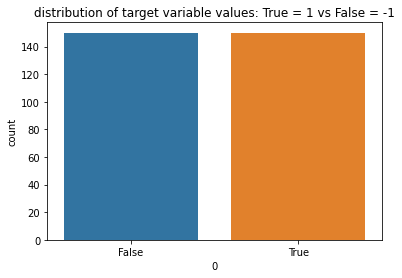

In [ ]:
# checking y_train values distribution

sns.countplot(y_train[0]== 1 )
plt.title('distribution of target variable values: True = 1 vs False = -1')

# Repeting the same preprocessing phase with the validation data

In [ ]:
valid = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/dexter/DEXTER/dexter_valid.data',sep=' ',names=tt)
#valid=valid.dropna(axis=1, how='all')
valid=valid.fillna(0)
valid.head()

,om8XSGxvE6,IoTauIiOer,wFn1PLAGa6,I4QWj492Gz,8uXxnvsG9x,zpzqiN4EqO,yvysqlwCNz,3pehZBjLTN,olXe1GPX41,tKXDSCbJ3Q,rpPUnEy4Lf,KsNaAhMULV,bXof33QKGk,C9vI30D6GF,DRv9Hcxh6O,YSCYfmZY37,6oIYJVHCpA,dfwm5XMHmy,DpFkqZdzdh,dwHvHieF2G,qtCaSAwWDs,Sh4uYjFdN0,rA4OpTjKig,MDXPUpdCU6,CKsFwS9NFV,uPehbycpCW,gOWtJeOZgk,dBney8eqWL,mnmbayi52M,3WMvS0wHLJ,tF87JTYrGN,jJV5OiF9Bj,VqKuEl0L9v,DSCQADCN75,2PY1IhlV7G,4qrlR9Ln7R,Ap4fPxSKGt,EOTaLw4xFX,TW72HKvPiB,OpRvbAr8vO,...,m8fHm9AmDF,LvHTdkWSq7,LGuIBmeKqL,UXToLxK9km,zH1tPCJ0te,aO9pXfDKGT,yfb76WDfe4,SQXyxRUDV1,Vvr3gW9XUw,fhsOlHcklr,kTPxtwvMzZ,15zd8iUW5D,0d5G3iTgyi,hxr5tI7iyM,wxeRsL6N3E,cS21NMKNnW,ChQ4lKBMIJ,D8JGsmTGfX,E8zIEg781v,SlYXgNTxS5,DahCBTTipL,Zj2pCkwTFv,GV3NFgp5jx,jDTHsspzyJ,eJEYynvWIr,PJDFmICgnR,FZ28OtIEca,4K2WRnP3YB,EwI2RZjRH7,s1lKYsrxf9,2gQfFKBZnG,Jvbrp6nK1D,ubaISieXlF,mf8iAyeo7E,MniowedF9U,upGhiImd6h,RLckwyqYuk,6KRwGbFBCo,GGSdhuKUgm,6SDZaY00xB
0,17:113,80:66,247:54,850:94,1052:29,1205:153,1889:71,2339:52,2488:443,2982:97,3273:96,3341:269,3578:15,3876:93,4045:106,4182:150,4925:160,5551:57,5589:241,5760:80,5783:144,6234:105,6866:560,6973:60,7055:41,7463:138,7494:213,7570:79,7709:194,7836:91,8214:78,8333:60,8548:79,8759:77,8943:113,9232:162,9331:301,10021:104,10276:39,10343:99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,287:79,520:48,608:125,748:45,1040:49,1267:109,1368:55,1402:31,1691:87,1968:64,2110:145,2136:108,2339:42,2538:61,2737:26,2910:103,2990:57,3012:74,3086:36,3337:58,3436:95,3578:24,3860:48,3870:53,3988:54,4376:83,4385:96,4614:33,4707:41,4887:121,5760:198,6060:83,6351:167,6549:54,6866:299,6927:96,7086:49,7164:62,7709:171,8206:766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,626:74,754:112,875:69,939:119,955:126,1040:147,1057:77,1157:18,1808:58,1914:55,1968:95,1985:93,2044:105,2251:59,2407:136,2522:180,4707:61,4711:96,4723:62,4820:72,5128:54,5267:76,5577:97,6060:119,6234:173,6866:86,7435:102,7451:75,7661:73,7709:49,7710:324,8342:147,8475:74,8688:32,8804:201,9158:109,9233:138,9565:104,9596:327,9671:82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,558:40,865:77,1040:17,1268:88,1513:69,1991:87,2383:88,2934:105,2990:173,3578:8,3713:79,3986:38,4576:64,4744:166,4877:66,5417:69,5632:23,5728:67,5937:50,5946:136,6234:62,6315:78,6476:24,6500:48,6706:86,6719:103,6730:37,6866:410,7494:117,7709:136,8078:37,8320:43,8522:838,8548:43,8644:438,8647:28,8700:80,10194:68,10532:265,10779:79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,285:121,312:171,520:42,1244:437,1268:92,1395:105,1682:117,2062:74,2089:138,2349:155,2851:208,2894:65,2990:132,3086:64,3187:81,3578:22,3911:116,4457:148,4472:110,4860:204,4968:222,5030:86,5162:27,5361:77,5417:107,5449:104,5551:83,5843:20,5959:66,6843:107,6866:259,7052:143,7169:196,7336:117,7709:393,8731:144,8804:81,8913:89,8932:222,9056:82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
valid.shape

(300, 329)

In [ ]:
new_valid=pd.DataFrame()
for i in range(300):
  for j in range(329):
    if  (valid.iloc[i,j]!=0):
      new_valid.loc[i,(valid.iloc[i,j].split(':')[0])]=(valid.iloc[i,j].split(':')[1])

In [ ]:
new_valid = new_valid.fillna(0)
new_valid.head()

,17,80,247,850,1052,1205,1889,2339,2488,2982,3273,3341,3578,3876,4045,4182,4925,5551,5589,5760,5783,6234,6866,6973,7055,7463,7494,7570,7709,7836,8214,8333,8548,8759,8943,9232,9331,10021,10276,10343,...,19695,19744,19829,999,1703,2138,2171,6270,7728,10757,14033,17857,18732,19988,479,1055,1223,1440,2938,3563,3898,4712,4880,6569,7119,7432,11386,11452,11785,15171,15526,16216,16968,17411,17667,17954,18210,18809,19658,19690
0,113,66,54,94,29,153,71,52,443,97,96,269,15,93,106,150,160,57,241,80,144,105,560,60,41,138,213,79,194,91,78,60,79,77,113,162,301,104,39,99,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,42,0,0,0,0,24,0,0,0,0,0,0,198,0,0,299,0,0,0,0,0,171,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,173,86,0,0,0,0,0,49,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,62,410,0,0,0,117,0,136,0,0,0,43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,0,0,83,0,0,0,0,259,0,0,0,0,0,393,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# updating the validation data type into integer
new_valid = new_valid.astype(np.int64)

In [ ]:
filter = new_train.columns.intersection(new_valid.columns)
new_train = new_train[filter]
new_valid = new_valid[filter]

In [ ]:
new_train.shape

(300, 4563)

In [ ]:
new_valid.shape

(300, 4563)

In [ ]:
# importing the validation set target rariable 
y_valid= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/dexter/dexter_valid.labels',sep=' ', header=None , error_bad_lines=False )
y_valid.head()

,0
0,1
1,1
2,-1
3,1
4,-1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'distribution of validation target variable values: True = 1 vs False = -1')

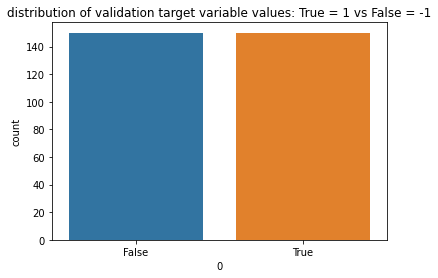

In [ ]:
# checking y_valid values distribution
import seaborn as sns 
sns.countplot(y_valid[0]== 1 )
plt.title('distribution of validation target variable values: True = 1 vs False = -1')

## Running Different Machine Learning Classification Models and comparing the accuracy

### 1- Extreme Gradient Boosting Classifier

In [ ]:
#creating an xgboost classifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgboost = XGBClassifier() 
xgboost.fit(new_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred = xgboost.predict(new_valid)
predictions = [round(value) for value in y_pred]


# evaluate predictions
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.67%


### 2- Logistic Regression

In [ ]:
 #creating a logistic regression classifier 
 from sklearn.linear_model import LogisticRegression
 lr = LogisticRegression()
 lr.fit(new_train, y_train)

LogisticRegression()

In [ ]:
y_pred2 = lr.predict(new_valid)
predictions2 = [round(value) for value in y_pred2]


# evaluate predictions
accuracy2 = accuracy_score(y_valid, predictions2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.67%


### 3- Neural Networks

In [ ]:
!pip install keras

In [ ]:
from tensorflow import keras
from keras.models import Sequential 

# Creating the Neural Net
input_dim = new_train.shape[1]  # Number of features
model = Sequential()

model.add(keras.layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.add(keras.layers.Dense(1, activation='softmax'))

model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])

# model fitting 
history = model.fit(new_train, y_train, epochs=50, verbose=False, validation_data=(new_valid, y_valid)) 

# model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 20)                91280     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 10)                210       
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 1)                 11        
Total params: 91,501
Trainable params: 91,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# accuracy score
loss_train, accuracy_train = model.evaluate(new_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy_train))
loss_validation, accuracy_validation = model.evaluate(new_valid, y_valid, verbose=False)
print("validation Accuracy:  {:.4f}".format(accuracy_validation))

Training Accuracy: 0.5000
validation Accuracy:  0.5000


---------------------- 
# Using Lazy_predict library to compare 29 models at a time

In [ ]:
### importing lazypredict library
import lazypredict

### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier

### importing LazyClassifier for classification problem because here we are solving Classification use case.
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [ ]:
# fitting data in our Lazypredict Classifier
models,predictions = clf.fit(new_train, new_valid, y_train, y_valid)

100%|██████████| 29/29 [00:14<00:00,  2.06it/s]


In [ ]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.93,0.93,0.93,0.93,0.39
BernoulliNB,0.91,0.91,0.91,0.91,0.22
RandomForestClassifier,0.91,0.91,0.91,0.91,0.41
LGBMClassifier,0.90,0.90,0.90,0.90,0.35
BaggingClassifier,0.90,0.90,0.90,0.90,0.45
XGBClassifier,0.90,0.90,0.90,0.90,2.69
PassiveAggressiveClassifier,0.87,0.87,0.87,0.87,0.20
LogisticRegression,0.87,0.87,0.87,0.87,0.27
RidgeClassifierCV,0.86,0.86,0.86,0.86,0.36


# Selecting and Building the Best Model: the Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

- n_estimators = number of trees in the foreset.
- max_features = max number of features considered for splitting a node.
- max_depth = max number of levels in each decision tree.
- min_samples_split = min number of data points placed in a node before the node is split.

In [ ]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 10,
                                        criterion ='entropy', max_features = 10)
  
# Training the model
extra_tree_forest.fit(new_train, y_train)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

In [ ]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(new_train, y_train) 

# accuracy score
score4 = lr.score(new_valid, y_valid)
print('our model accuracy is:', score4 )

our model accuracy is: 0.93


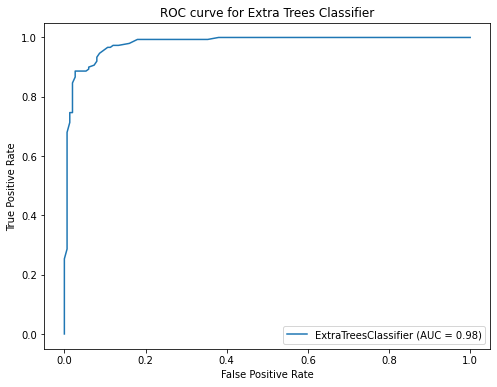

In [ ]:
from sklearn import metrics 

plt.rcParams["figure.figsize"] = (8,6) 

metrics.plot_roc_curve(clf, new_valid, y_valid)  
plt.title('ROC curve for Extra Trees Classifier')
plt.show()                                 

[ Explain IT ]

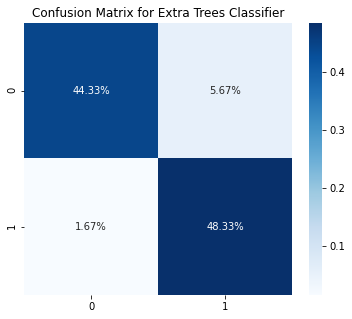

In [ ]:
#Generate predictions with the model using our X values
y_pred = clf.predict(new_valid)

#Get the confusion matrix
cf_matrix = metrics.confusion_matrix(y_valid, y_pred)

# visualizing the confusion matrix

plt.rcParams["figure.figsize"] = (6,5) 
plt.title('Confusion Matrix for Extra Trees Classifier')
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

[Explain it ]

In [ ]:
importances = list(zip(extra_tree_forest.feature_importances_, new_train.columns))
importances.sort(reverse=True)
importances = importances[0:20]
importances

[(0.013146943170902156, '4308'),
 (0.012131353445820867, '14665'),
 (0.012052150460774803, '13929'),
 (0.011654245706076514, '19685'),
 (0.00995065004991176, '17487'),
 (0.009812740175346812, '3578'),
 (0.009416429514403524, '1244'),
 (0.008718946099746673, '626'),
 (0.008565019410600158, '1914'),
 (0.008491979697444587, '17017'),
 (0.008149317948935215, '1565'),
 (0.007261584075598316, '8215'),
 (0.0071435529746026625, '6927'),
 (0.006035299967553306, '12610'),
 (0.0054904559592517796, '13685'),
 (0.005378209109739284, '19386'),
 (0.005117160151145991, '17173'),
 (0.004958919671488341, '1040'),
 (0.004753685655073581, '12170'),
 (0.004326147686081108, '5959')]

In [ ]:
feature_importance = pd.DataFrame(importances ,columns=['Importance_score','word_index'])
feature_importance

,Importance_score,word_index
0,0.01,4308
1,0.01,14665
2,0.01,13929
3,0.01,19685
4,0.01,17487
5,0.01,3578
6,0.01,1244
7,0.01,626
8,0.01,1914
9,0.01,17017


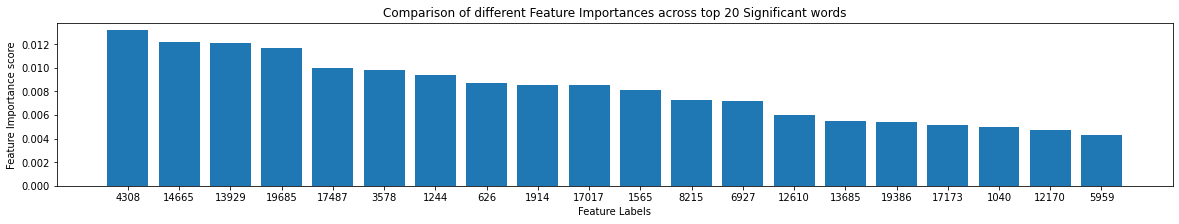

In [ ]:
# Plotting a Bar Graph to showcase top important words
plt.rcParams["figure.figsize"] = (20,3) 

plt.bar(feature_importance.word_index, feature_importance.Importance_score)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importance score')
plt.title('Comparison of different Feature Importances across top 20 Significant words')
plt.show()